In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from read_data import read_flows_imgs
from flow_algo import flow_to_color
from metrics import flow_norm_diff, ang_error, epe_error

Visualizing vectors
====================

In [3]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['mydata/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['mydata/1.bmp', 'mydata/2.bmp'],
    n = 1)
flow_labels = ['FlowNet 1']

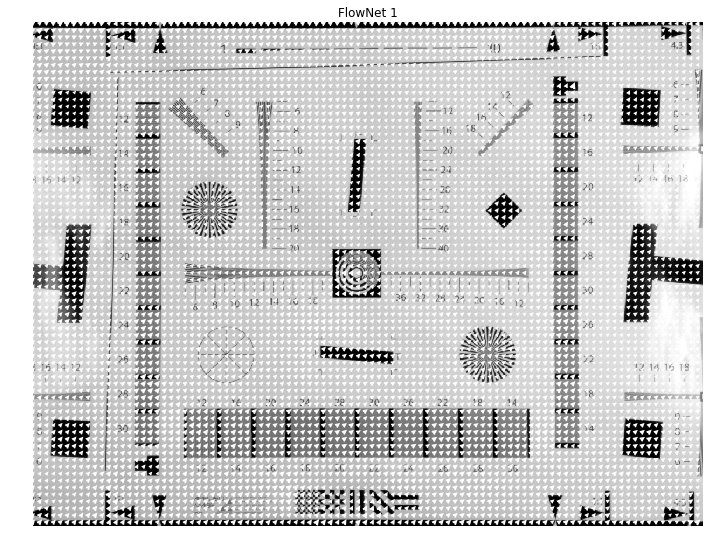

In [4]:
for img_num in xrange(1):
    flows = all_flows[img_num]
    h, w = flows[0].shape[:-1]
    
    x, y = np.meshgrid(np.arange(0, w), np.arange(0, h))
    factor = 12
    x = x[::factor,::factor]
    y = y[::factor,::factor]
    
    titles = flow_labels
    nrows = len(flows) / 2
    ncols = 1
    fig = plt.figure(figsize = (12, 12))

    u = flows[0][::factor,::factor, 0]
    v = flows[0][::factor,::factor, 1]

    plt.axis('off')

    plt.title(titles[0])

    shown_img = plt.imshow(all_imgs[img_num][0])

    plt.quiver(x, y, u, v, pivot='mid', color='white', angles='xy', headlength=4, antialiased=True,
               headwidth = 4)

In [3]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['data/{0:0>7}-gt.flo', 'data/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['data/{0:0>7}-img0.ppm', 'data/{0:0>7}-img1.ppm'],
    n = 8)
flow_labels = ['Ground truth', 'FlowNet 1']

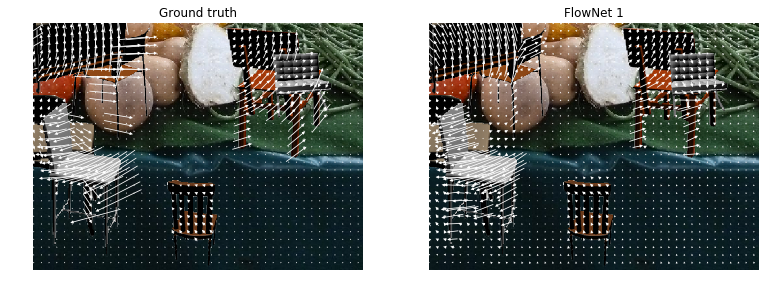

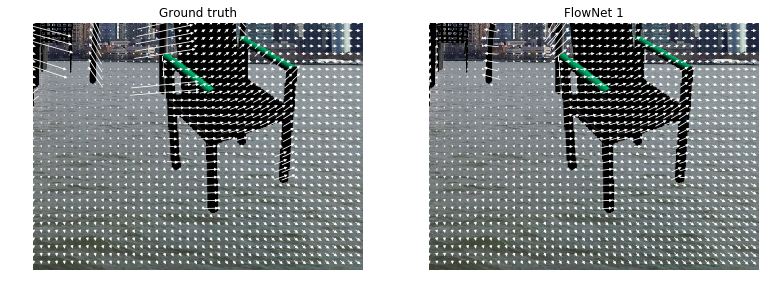

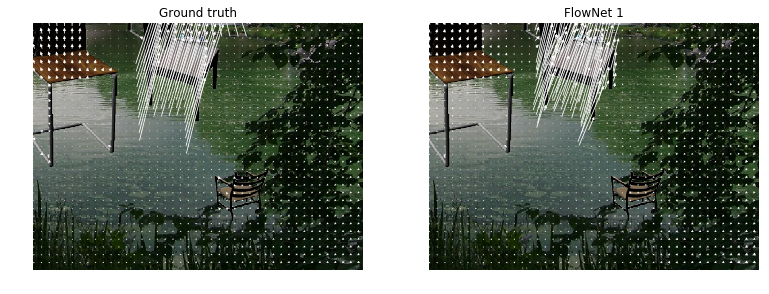

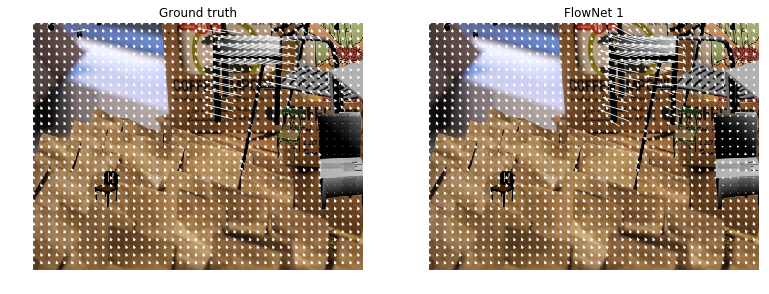

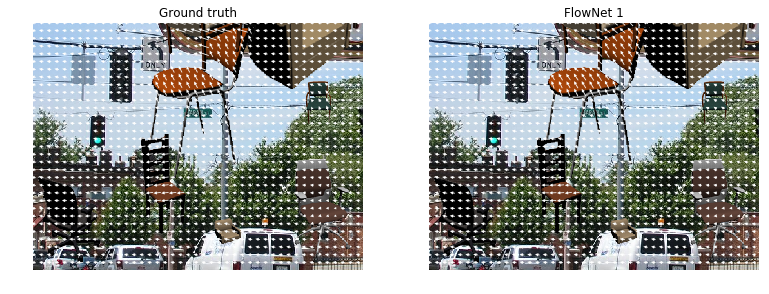

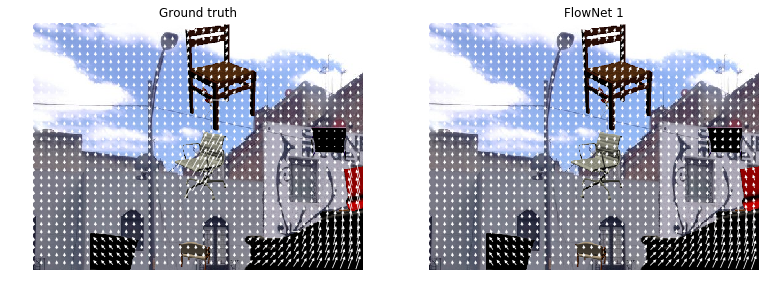

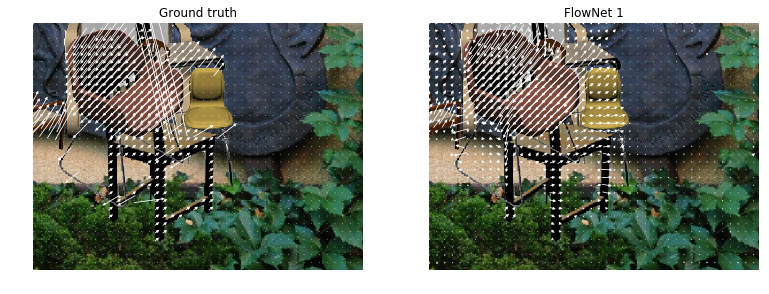

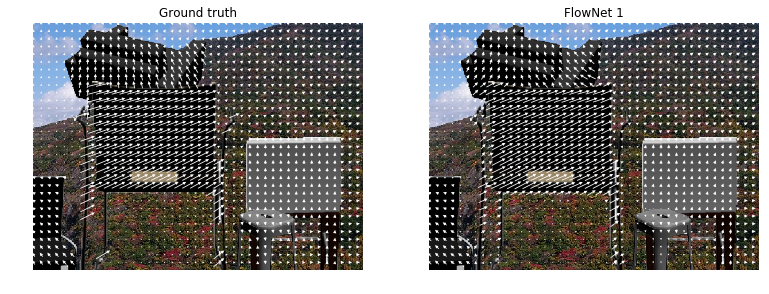

In [6]:
for img_num in xrange(len(all_flows)):
    flows = all_flows[img_num]
    h, w = flows[0].shape[:-1]
    
    x, y = np.meshgrid(np.arange(0, w), np.arange(0, h))
    factor = 12
    x = x[::factor,::factor]
    y = y[::factor,::factor]
    
    titles = flow_labels
    nrows = len(flows) / 2
    ncols = 2
    fig = plt.subplots(1, 2, figsize = (13, 5))
    for flow_num in xrange(len(flows)):

        u = flows[flow_num][::factor,::factor, 0]
        v = flows[flow_num][::factor,::factor, 1]

        plt.subplot(1, 2, flow_num + 1)
        plt.axis('off')

        plt.title(titles[flow_num])

        shown_img = plt.imshow(all_imgs[img_num][0])

        plt.quiver(x, y, u, v, pivot='mid', color='white', angles='xy', headlength=4, antialiased=True,
                   headwidth = 4)

Colorcoding vectors
================

In [7]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['data/{0:0>7}-gt.flo', 'data/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['data/{0:0>7}-img0.ppm', 'data/{0:0>7}-img1.ppm'],
    n = 8)
flow_labels = ['Ground truth', 'FlowNet 1']

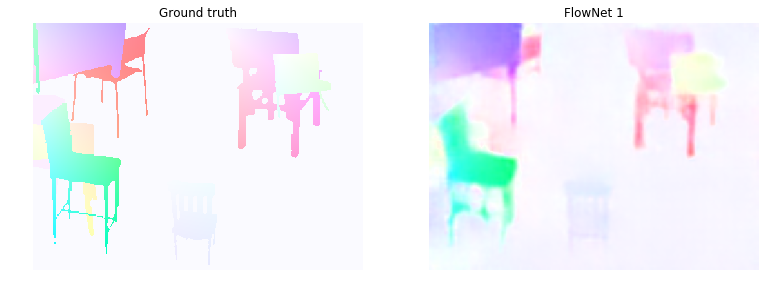

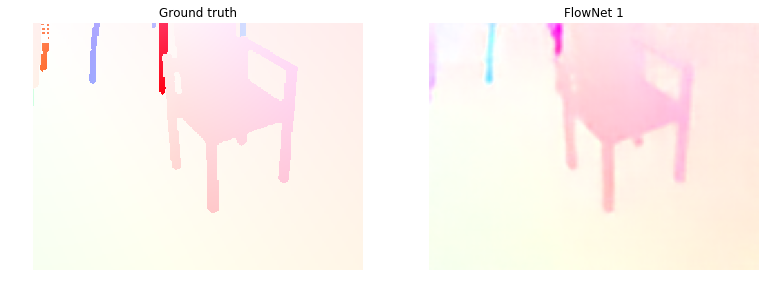

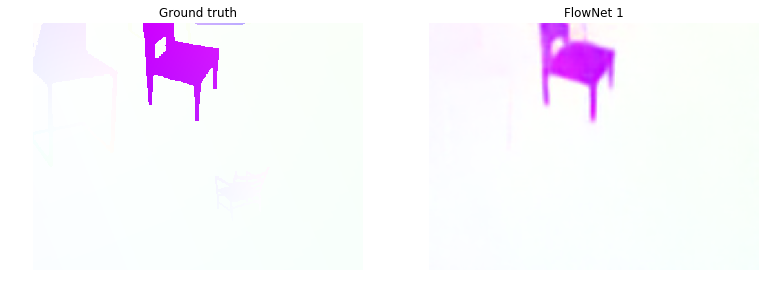

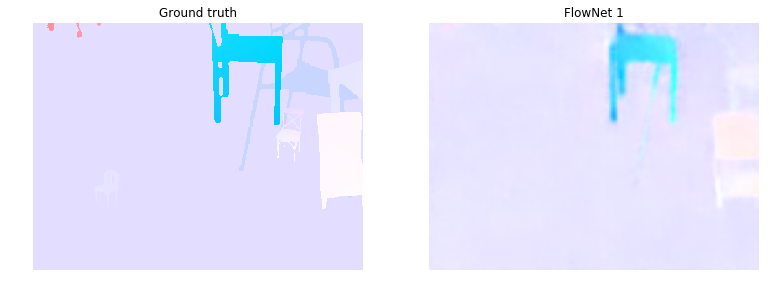

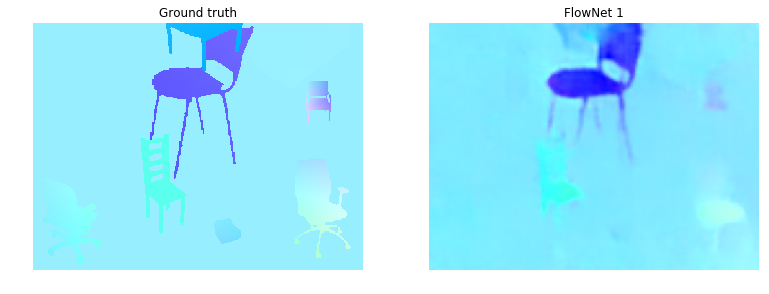

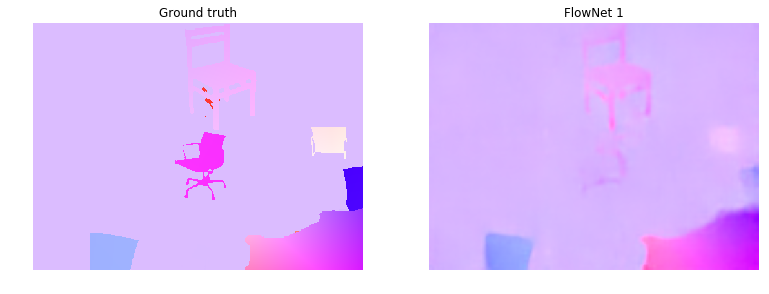

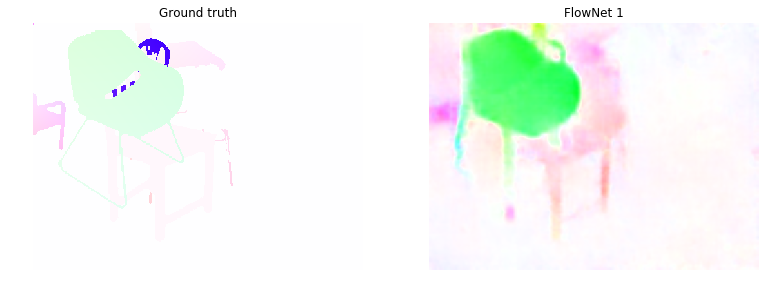

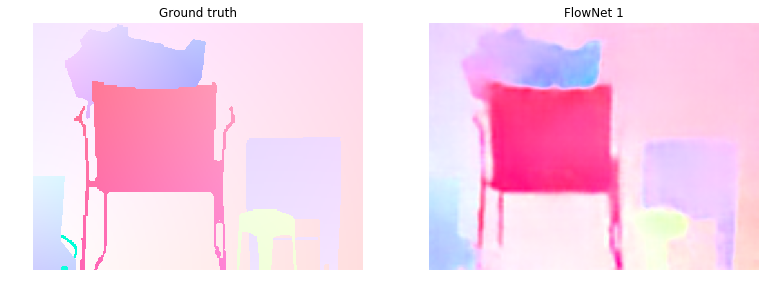

In [8]:
for img_num in xrange(8):
    flows = all_flows[img_num]
    
    titles = flow_labels
    nrows = len(flows) / 2
    ncols = 2
    fig = plt.subplots(1, 2, figsize = (13, 5))
    for flow_num in xrange(len(flows)):
        plt.subplot(1, 2, flow_num + 1)
        plt.axis('off')

        plt.title(titles[flow_num])
        
        img = flow_to_color(flows[flow_num])
        shown_img = plt.imshow(img)

In [9]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['mydata/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['mydata/1.bmp', 'mydata/2.bmp'],
    n = 1)
flow_labels = ['FlowNet 1']

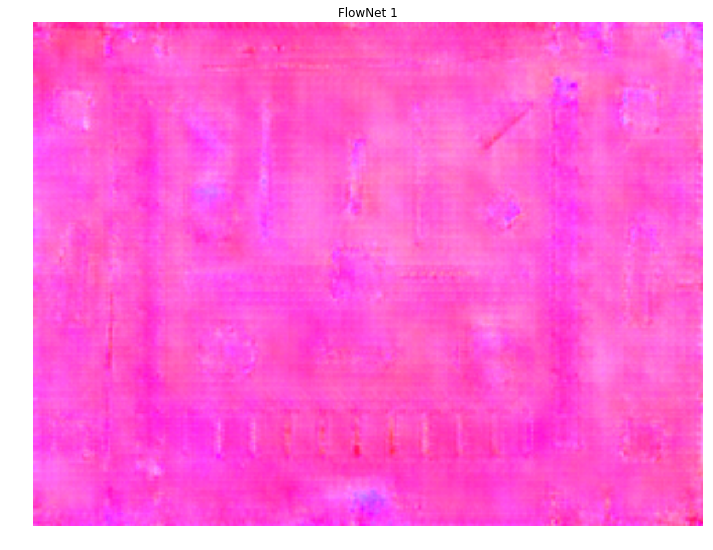

In [10]:
for img_num in xrange(1):
    flows = all_flows[0]
    
    titles = flow_labels
    nrows = len(flows) / 2
    ncols = 1
    fig = plt.figure(figsize = (12, 12))
    plt.axis('off')

    plt.title(titles[0])

    img = flow_to_color(flows[0])
    shown_img = plt.imshow(img)

Visualizing diff and computing error metrics
===========

In [11]:
all_flows, all_imgs = read_flows_imgs(
    flow_patterns = ['data/{0:0>7}-gt.flo', 'data/flownets-pred-{0:0>7}.flo'],
    img_patterns = ['data/{0:0>7}-img0.ppm', 'data/{0:0>7}-img1.ppm'],
    n = 8)
flow_labels = ['Ground truth', 'FlowNet 1']

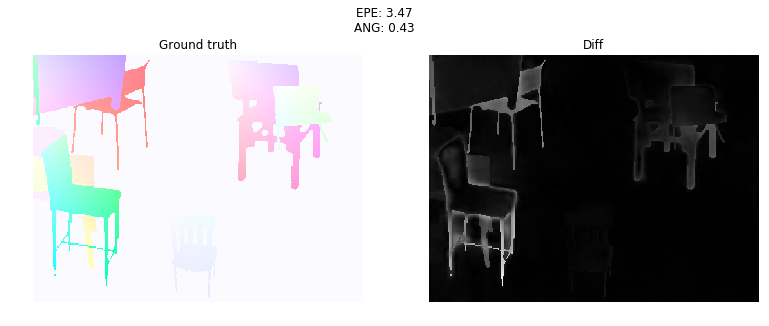

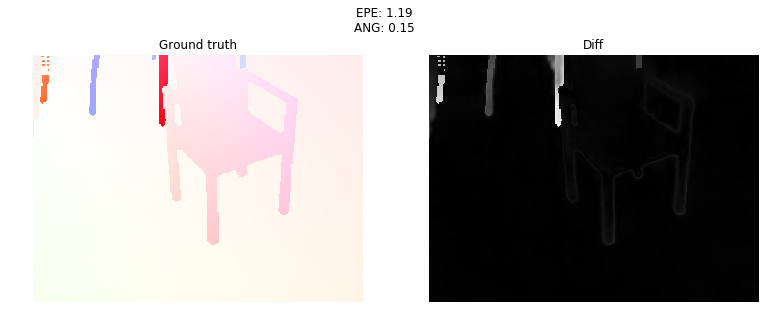

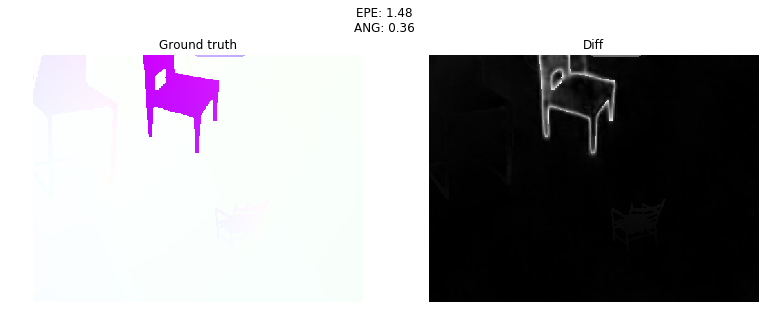

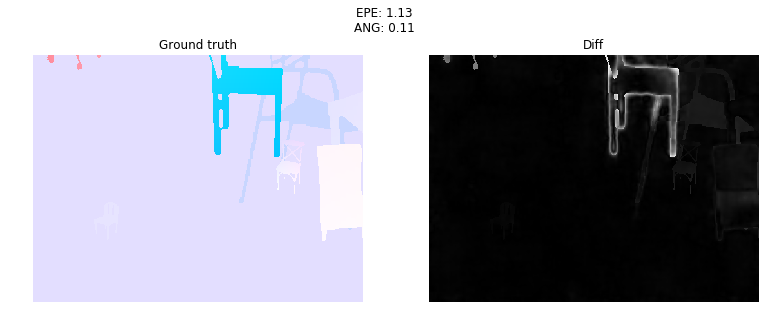

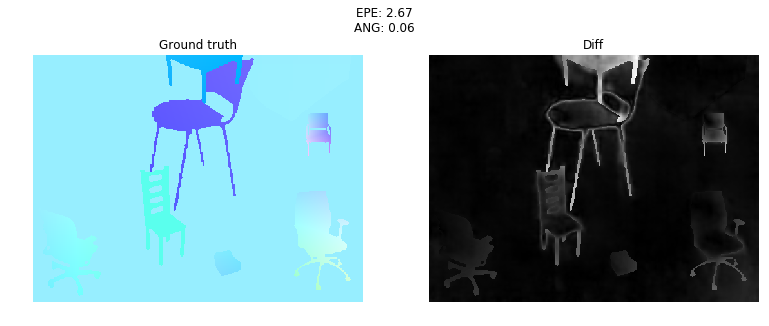

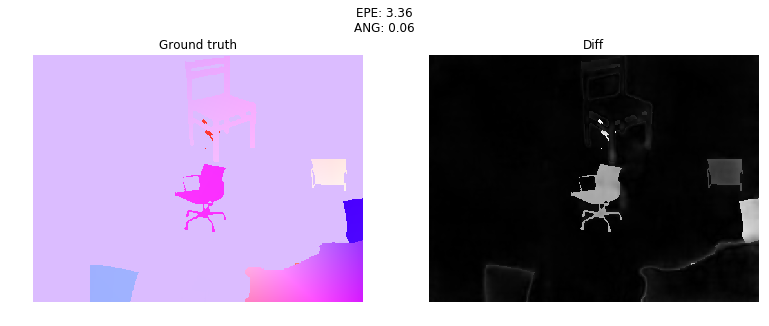

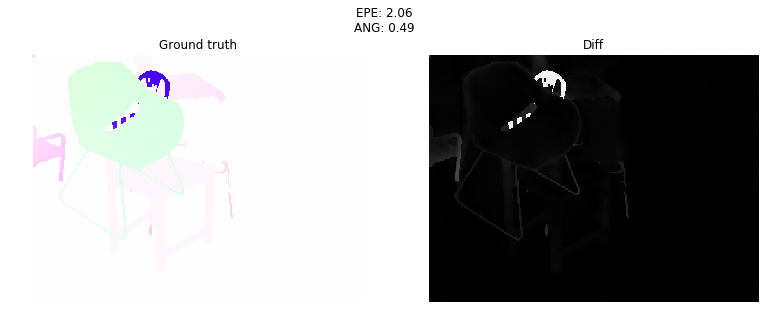

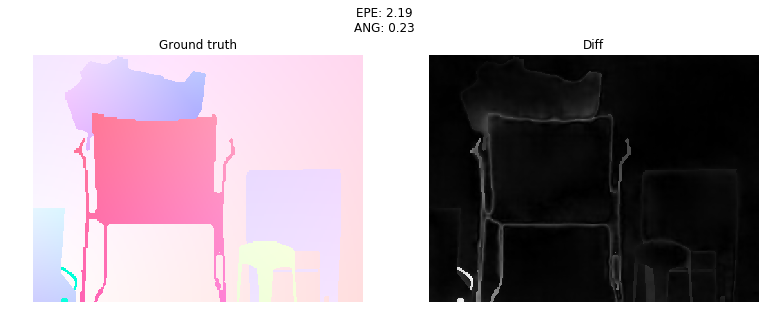

In [12]:
for img_num in xrange(8):
    flows = all_flows[img_num]
    
    titles = flow_labels
    nrows = len(flows) / 2
    ncols = 2
    fig = plt.subplots(1, 2, figsize = (13, 5))
    
    epe = epe_error(flows)
    ang = ang_error(flows)
    plt.suptitle('EPE: {0:.2f}\nANG: {1:.2f}'.format(epe, ang), fontsize=12)
    
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title('Ground truth')
    
    img = flow_to_color(flows[0])
    shown_img = plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title('Diff')

    diff = flow_norm_diff(flows)
    shown_img = plt.imshow(diff, cmap = 'gray')